# Columns Explanations

Fiscal Year- The government’s financial year (usually runs from April to March) in which the salary or payment is recorded.

Agency Name- The name of the government agency or department where the employee works.

Last Name- The employee’s surname or family name.

First Name- The employee’s given (first) name.

Mid Init- The initial of the employee’s middle name (e.g., "A" for "Alex").

Agency Start Date- The date when the employee joined the agency.

Work Location Borough- The area or borough in New York where the employee works (e.g., Manhattan, Bronx).

Title Description- The job title or position of the employee (e.g., Clerk, Officer, Engineer).

Leave Status as of June 30- The employee’s work/leave status as of June 30 (whether they are active or on leave).

Base Salary- The fixed base pay the employee earns (without including overtime or bonuses).

Pay Basis- The time basis of the pay – whether the salary is yearly, monthly, hourly, etc.

Regular Hours- The number of regular (standard) working hours the employee is scheduled to work.

Regular Gross Paid- The total money paid for the regular working hours.

OT Hours- The number of hours the employee worked as overtime (extra hours beyond regular time).

Total OT Paid- The total amount of money paid for overtime work.

Total Other Pay- Any other additional payments like bonuses, allowances, or incentives.

# Hypotheses

- Employees working in high-cost boroughs (like Manhattan) receive higher other payments (bonuses, allowances) to compensate for living expenses.
- The number of overtime hours is highest in departments/agencies located in outer boroughs due to understaffing.
- Some job titles have significantly lower base salaries but higher "other pay" components.
- Employees with over 10 years in service (based on Agency Start Date) are more likely to receive higher Total Other Pay (like longevity bonuses).
- Employees who do high overtime hours receive less regular gross pay, indicating they may be part-time or hourly-based.
- Overtime hours are more common in certain agencies regardless of title.
- Hourly workers earn more through overtime than salaried (annual/monthly) employees.
- Employees with hourly pay basis work fewer regular hours but more overtime hours compared to salaried workers.
- Regular gross pay is directly proportional to regular hours worked – except in hourly roles where fluctuations are common.
- Some employees earn high total pay (base + OT + other) despite working fewer regular hours – possibly indicating management or special duty staff.
- Employees with higher job titles (e.g., “Manager”, “Director”) earn significantly higher base salaries than lower-level roles (e.g., “Clerk”).
- Employees who joined the agency earlier tend to earn more in terms of base salary.
- Employees with longer service are more likely to be on leave as of June 30.
- Employees on leave (as of June 30) tend to have lower total pay than active employees.
- Job titles with a high proportion of “other pay” (bonuses, allowances) contribute significantly to total earnings.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')
df

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_14264\2023598985.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')


,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,$47678.00,per Annum,1830.00,$47166.03,2.25,$57.28,$0.00
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,$119959.00,per Annum,1831.00,$119042.50,0.00,$0.00,$0.00
2,2016,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,$39966.00,per Annum,1181.68,$27452.62,1.00,$21.34,$33.00
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,$116000.00,per Annum,1831.00,$115104.57,0.00,$0.00,$0.00
4,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,$1.00,per Hour,0.00,$3500.00,0.00,$0.00,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194483,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,G,10/02/2006,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$80643.00,per Annum,2051.43,$87321.90,113.00,$7667.53,$3624.24
2194484,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,C,01/18/2000,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$88883.00,per Annum,2051.43,$99746.21,117.00,$9491.90,$3624.24
2194485,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,NaN,03/17/1997,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$89686.00,per Annum,2051.43,$96646.24,63.00,$4937.42,$3624.24
2194486,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,J,04/19/1993,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$94245.00,per Annum,2051.43,$105281.70,22.00,$1544.83,$3624.24


In [5]:
df.columns

Index(['Fiscal Year', 'Agency Name', 'Last Name', 'First Name', 'Mid Init',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid',
       'Total Other Pay'],
      dtype='object')

In [7]:
df.dtypes

Fiscal Year                     int64
Agency Name                    object
Last Name                      object
First Name                     object
Mid Init                       object
Agency Start Date              object
Work Location Borough          object
Title Description              object
Leave Status as of June 30     object
Base Salary                    object
Pay Basis                      object
Regular Hours                 float64
Regular Gross Paid             object
OT Hours                      float64
Total OT Paid                  object
Total Other Pay                object
dtype: object

In [8]:
print(df.isnull().sum())

Fiscal Year                        0
Agency Name                        0
Last Name                        942
First Name                       952
Mid Init                      890008
Agency Start Date                  0
Work Location Borough         506214
Title Description                 21
Leave Status as of June 30         0
Base Salary                        0
Pay Basis                          0
Regular Hours                      0
Regular Gross Paid                 0
OT Hours                           0
Total OT Paid                      0
Total Other Pay                    0
dtype: int64


In [10]:
df.shape

(2194488, 16)

In [6]:
copy_df = df.copy()

In [8]:
# Columns with dollar signs to clean in the copied DataFrame
dollar_columns = ['Base Salary', 'Regular Gross Paid', 'Total OT Paid', 'Total Other Pay']

# Remove dollar signs and commas, convert to float
for col in dollar_columns:
    copy_df[col] = copy_df[col].replace('[\$,]', '', regex=True).astype(float)



<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_14264\1094337137.py:6: SyntaxWarning: invalid escape sequence '\$'
  copy_df[col] = copy_df[col].replace('[\$,]', '', regex=True).astype(float)


In [13]:
copy_df.dtypes

Fiscal Year                     int64
Agency Name                    object
Last Name                      object
First Name                     object
Mid Init                       object
Agency Start Date              object
Work Location Borough          object
Title Description              object
Leave Status as of June 30     object
Base Salary                   float64
Pay Basis                      object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtype: object

# EDA (Exploratory Data Analysis)

- Bronx, Queens, Richmond, and Manhattan (in some variations) show the highest average other pay.
- Some borough names are repeated or inconsistent (e.g., “MANHATTAN” and “Manhattan”), which should be cleaned for accuracy.

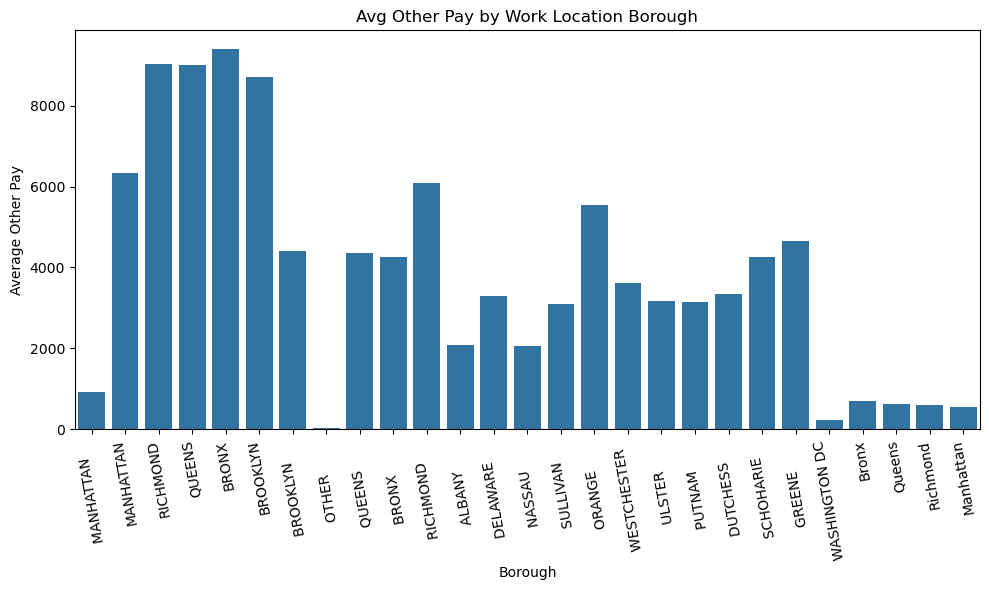

In [14]:
#Employees working in high-cost boroughs (like Manhattan) receive higher other payments (bonuses, allowances) to compensate for living expenses.
plt.figure(figsize=(10, 6))
sns.barplot(data=copy_df, x='Work Location Borough', y='Total Other Pay', estimator='mean' , errorbar = None)
plt.title("Avg Other Pay by Work Location Borough")
plt.xticks(rotation=100)
plt.ylabel("Average Other Pay")
plt.xlabel("Borough")
plt.tight_layout()
plt.show()

- Bronx, Queens, and Richmond have the highest overtime hours.
- Some boroughs like Nassau or Albany have very low OT hours, possibly indicating less workload or fewer employees.

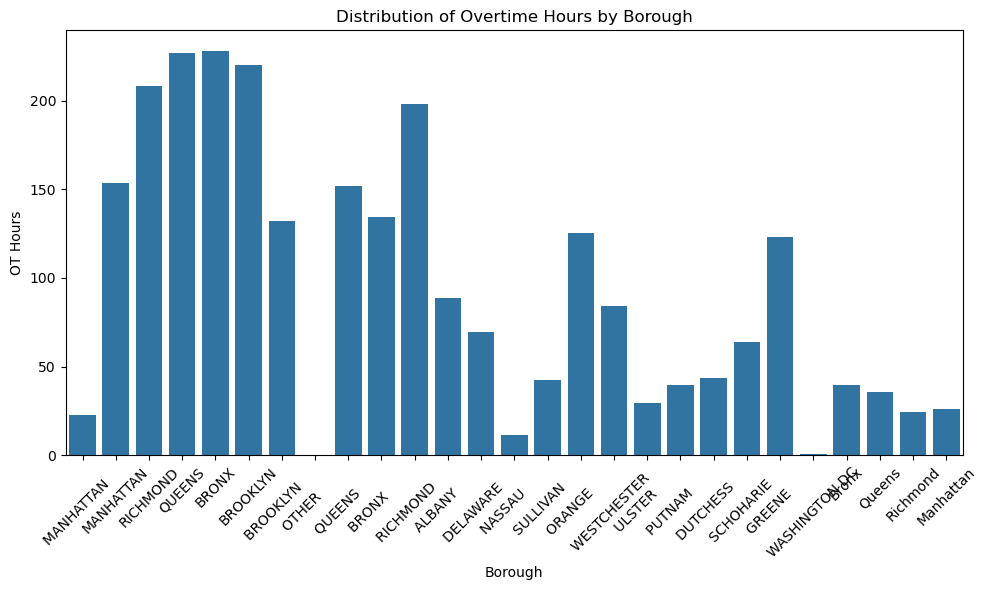

In [15]:
#The number of overtime hours is highest in departments/agencies located in outer boroughs due to understaffing.
plt.figure(figsize=(10, 6))
sns.barplot(data=copy_df, x='Work Location Borough', y='OT Hours' ,  errorbar = None)
plt.title("Distribution of Overtime Hours by Borough")
plt.xticks(rotation=45)
plt.ylabel("OT Hours")
plt.xlabel("Borough")
plt.tight_layout()
plt.show()

- There is no strong linear relationship between base salary and other pay.
- Some employees have high base salaries but negative other pay, which might suggest deductions or penalties.
- Most points cluster near 0 other pay, meaning many people don’t receive extra pay.

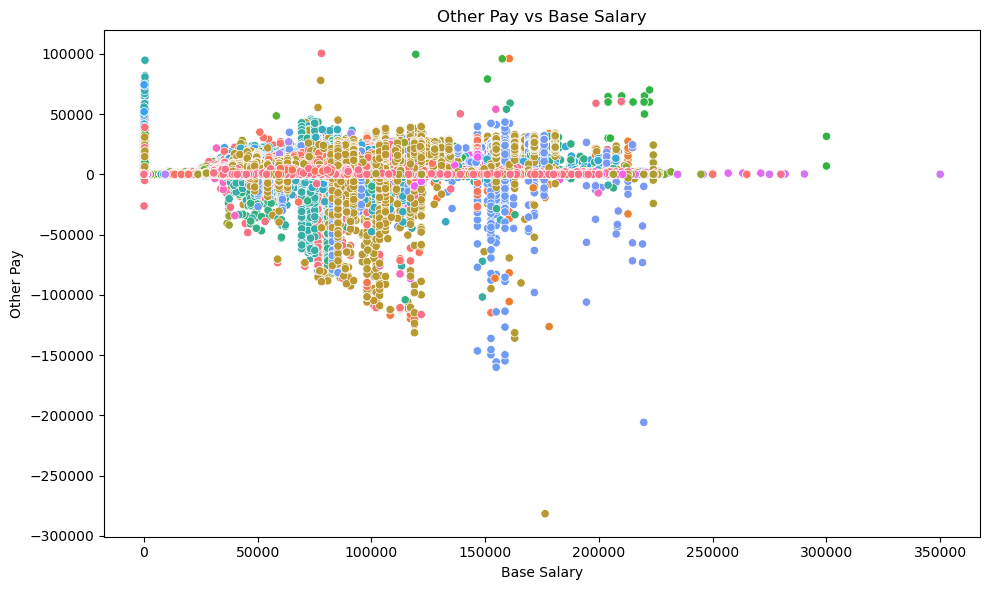

In [16]:
#Some job titles have significantly lower base salaries but higher "other pay" components.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=copy_df, x='Base Salary', y='Total Other Pay', hue='Title Description', legend=False)
plt.title("Other Pay vs Base Salary")
plt.xlabel("Base Salary")
plt.ylabel("Other Pay")
plt.tight_layout()
plt.show()

- Employees with 10+ years of service get significantly higher other pay than those with ≤10 years.
- This shows that experience matters when it comes to additional compensation.

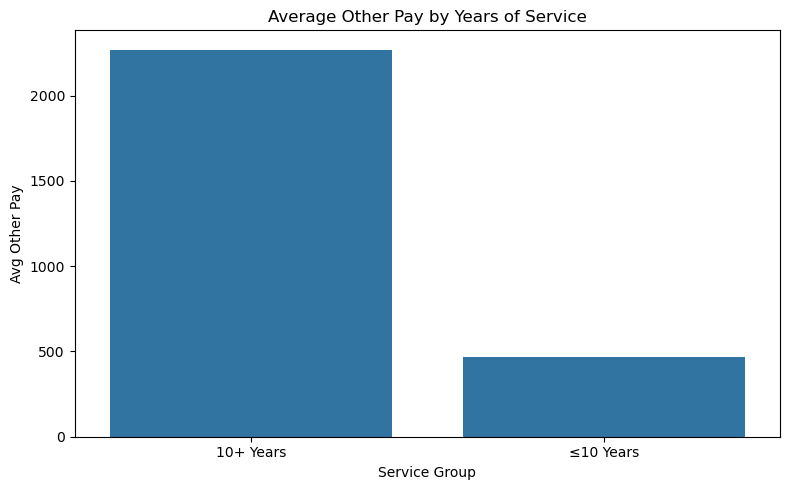

In [12]:
#Employees with over 10 years in service (based on Agency Start Date) are more likely to receive higher Total Other Pay (like longevity bonuses).
from datetime import datetime

# Convert start date to datetime
copy_df['Agency Start Date'] = pd.to_datetime(copy_df['Agency Start Date'], errors='coerce')

# Calculate years of service
copy_df['Years of Service'] = datetime.now().year - copy_df['Agency Start Date'].dt.year
# Filter valid data
plot_df = copy_df[['Years of Service', 'Total Other Pay']].dropna()

# over 10 years vs 10 or less
plot_df['Service Group'] = plot_df['Years of Service'].apply(lambda x: '10+ Years' if x > 10 else '≤10 Years')

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x='Service Group', y='Total Other Pay', estimator='mean' , errorbar = None)
plt.title("Average Other Pay by Years of Service")
plt.ylabel("Avg Other Pay")
plt.xlabel("Service Group")
plt.tight_layout()
plt.show()

- There’s a slight upward trend—more OT hours can lead to higher gross pay.
- However, after 1000 OT hours, gross pay doesn't increase much, which might mean a cap or diminishing returns.

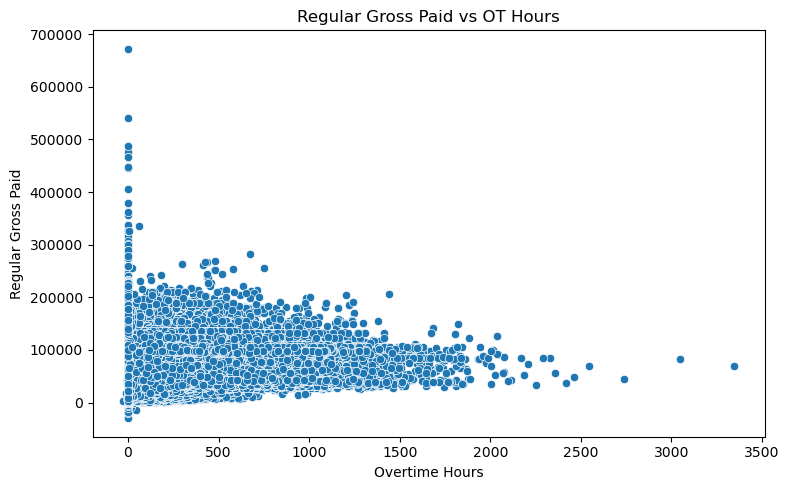

In [18]:
#Employees who do high overtime hours receive less regular gross pay, indicating they may be part-time or hourly-based.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=copy_df, x='OT Hours', y='Regular Gross Paid')
plt.title("Regular Gross Paid vs OT Hours")
plt.xlabel("Overtime Hours")
plt.ylabel("Regular Gross Paid")
plt.tight_layout()
plt.show()

- A few agencies like POLICE DEPARTMENT, SANITATION, and FIRE show very high OT hours.
- Most other agencies have low or moderate OT, likely due to different job responsibilities.

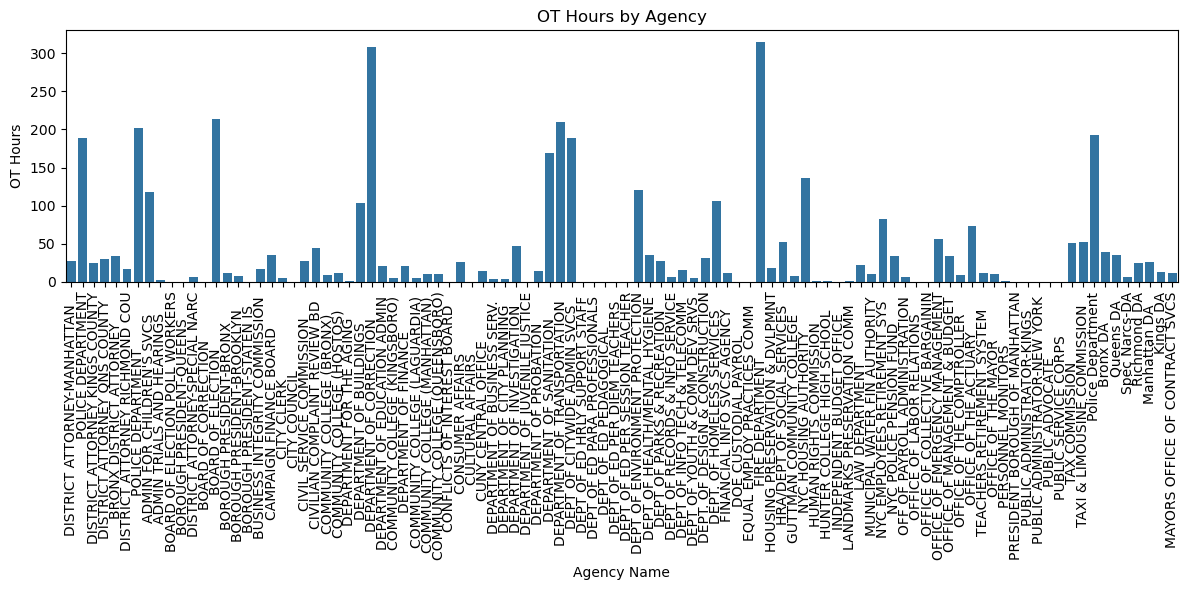

In [19]:
#Overtime hours are more common in certain agencies regardless of title.
top_agencies = copy_df['Agency Name'].value_counts().head(100).index
plot_df = copy_df[copy_df['Agency Name'].isin(top_agencies)]

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Agency Name', y='OT Hours', errorbar = None)
plt.xticks(rotation=90)
plt.title("OT Hours by Agency")
plt.tight_layout()
plt.show()



- Almost all OT pay is for employees paid per annum.
- Employees paid per hour receive very little OT pay, possibly because their pay already includes flexibility.

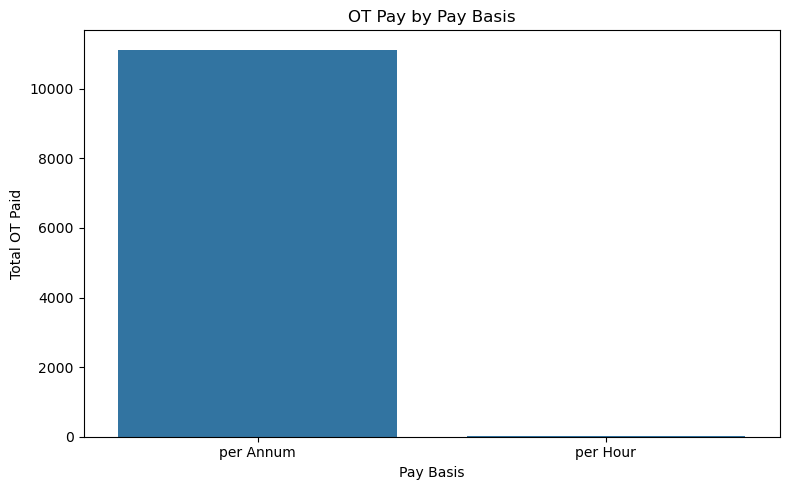

In [20]:
#Hourly workers earn more through overtime than salaried (annual/monthly) employees.

# Filter only Hourly and Yearly
plot_df = copy_df[copy_df['Pay Basis'].isin(['per Hour', 'per Annum'])]

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x='Pay Basis', y='Total OT Paid' , errorbar  = None)
plt.title("OT Pay by Pay Basis")
plt.xlabel("Pay Basis")
plt.ylabel("Total OT Paid")
plt.tight_layout()
plt.show()


- Employees paid per annum work more regular and OT hours.
- Per hour workers have less workload in both categories, possibly indicating part-time or casual status.

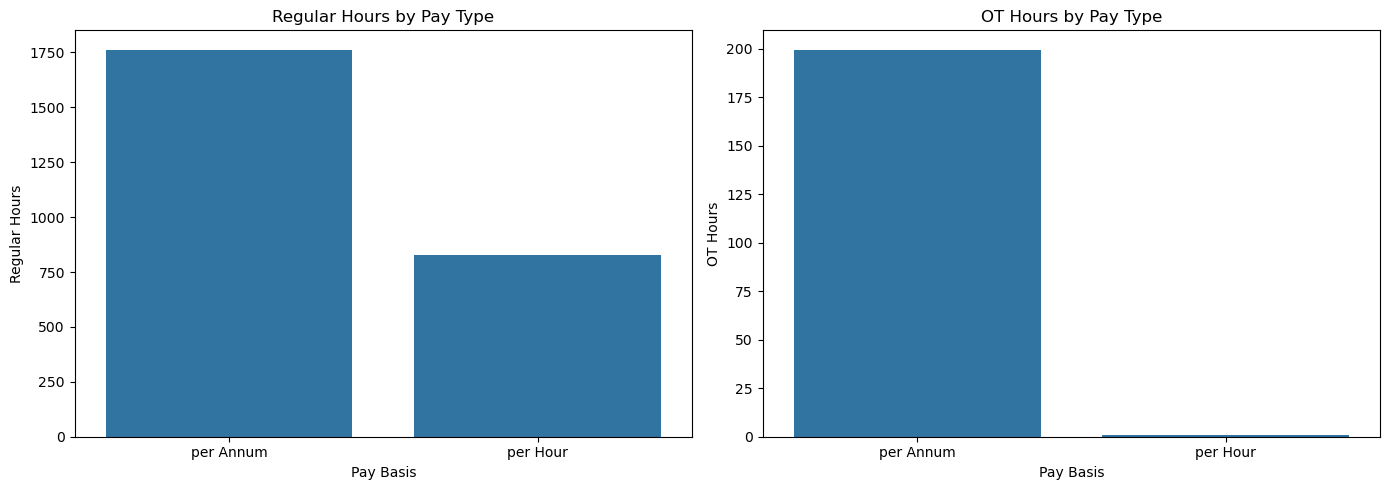

In [21]:
#Employees with hourly pay basis work fewer regular hours but more overtime hours compared to salaried workers.
# Split by pay basis
plot_df = copy_df[copy_df['Pay Basis'].isin(['per Hour', 'per Annum'])]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data=plot_df, x='Pay Basis', y='Regular Hours', ax=axs[0] , errorbar = None)
axs[0].set_title("Regular Hours by Pay Type")
sns.barplot(data=plot_df, x='Pay Basis', y='OT Hours', ax=axs[1],errorbar = None)
axs[1].set_title("OT Hours by Pay Type")
plt.tight_layout()
plt.show()


- Per annum employees dominate and generally have higher gross pay.
- Per hour or per day workers show much lower pay and work fewer hours.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_9240\900165349.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\PRENEEL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


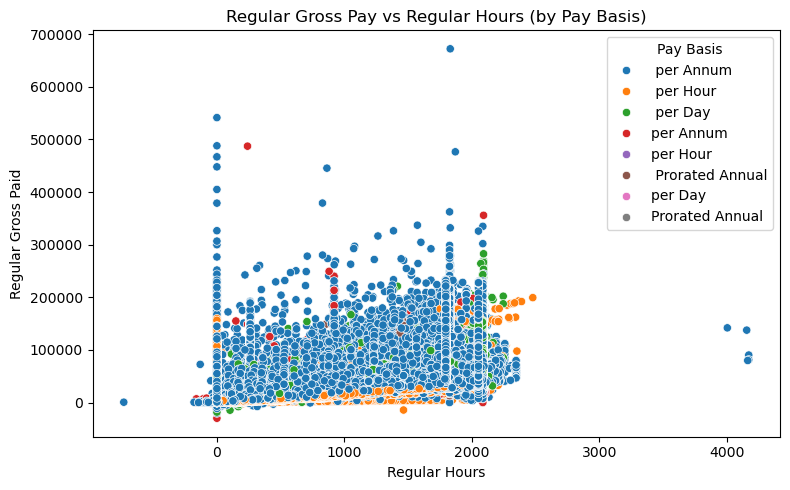

In [22]:
#Regular gross pay is directly proportional to regular hours worked – except in hourly roles where fluctuations are common.

plt.figure(figsize=(8, 5))
sns.scatterplot(data=copy_df, x='Regular Hours', y='Regular Gross Paid', hue='Pay Basis')
plt.title("Regular Gross Pay vs Regular Hours (by Pay Basis)")
plt.xlabel("Regular Hours")
plt.ylabel("Regular Gross Paid")
plt.tight_layout()
plt.show()


- Total pay generally increases with hours worked, but the trend is not perfectly linear.
- Some outliers with high pay but low hours might be due to bonuses or irregular compensation.

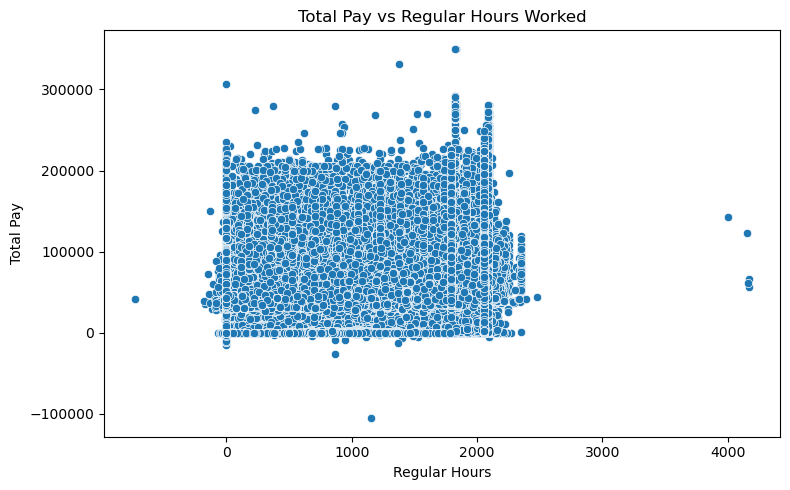

In [23]:
#Some employees earn high total pay (base + OT + other) despite working fewer regular hours – possibly indicating management or special duty staff.
# Create total pay column
copy_df['Total Pay'] = copy_df['Base Salary'] + copy_df['Total OT Paid'] + copy_df['Total Other Pay']

plt.figure(figsize=(8, 5))
sns.scatterplot(data=copy_df, x='Regular Hours', y='Total Pay')
plt.title("Total Pay vs Regular Hours Worked")
plt.xlabel("Regular Hours")
plt.ylabel("Total Pay")
plt.tight_layout()
plt.show()


- Senior roles earn the highest salaries, followed by Mid-level, and then Junior roles.
- This shows a clear progression: as job level increases, so does pay.

In [24]:
# Group by title and calculate average base salary
avg_salary_by_title = copy_df.groupby('Title Description')['Base Salary'].mean()

# Top 5 highest paying job titles
top_5_titles = avg_salary_by_title.sort_values(ascending=False).head(5)
print(" Top 5 Titles with Highest Avg Salary:\n")
print(top_5_titles)

# Bottom 5 lowest paying job titles
bottom_5_titles = avg_salary_by_title.sort_values().head(5)
print("\n Bottom 5 Titles with Lowest Avg Salary:\n")
print(bottom_5_titles)


 Top 5 Titles with Highest Avg Salary:

Title Description
PENSION INVESTMENT ADVISOR                                      288701.0
CHIEF ACTUARY                                                   267744.0
FIRST DEPUTY MAYOR                                              256542.8
DIRECTOR OF  INVESTMENTS                                        250960.0
CAPTAIN D/A CHIEF OF MANAGEMENT ANALYSIS AND PLANNING           224453.0
Name: Base Salary, dtype: float64

 Bottom 5 Titles with Lowest Avg Salary:

Title Description
ELECTION TRAINER                                                1.000000
INVESTMENT TRUSTEE - DEFERRED COMPENSATION                      1.000000
ELECTION WORKER                                                 1.007127
HCPPA                                                           1.025000
FOSTER GRANDPARENT                                              2.650000
Name: Base Salary, dtype: float64


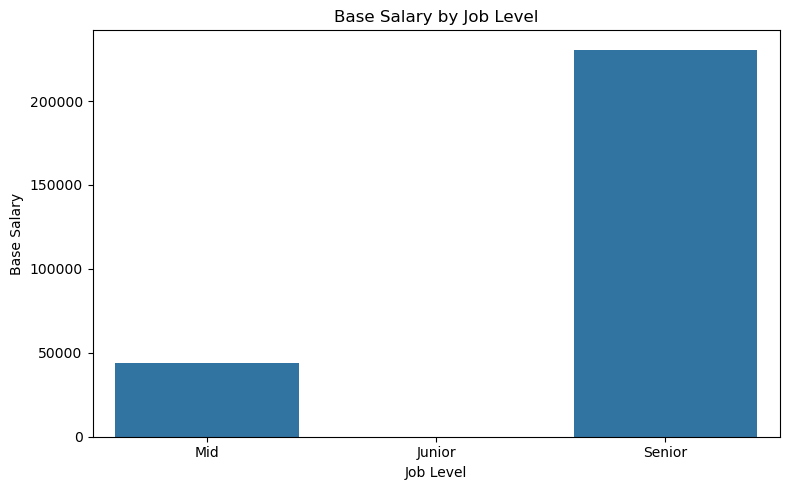

In [25]:
#Employees with higher job titles (e.g., “Manager”, “Director”) earn significantly higher base salaries than lower-level roles (e.g., “Clerk”).
# You can create a simple category manually or via keyword mapping
def job_level(title):
    title = str(title)
    if "PENSION INVESTMENT ADVISOR" in title or "CHIEF ACTUARY " in title or "FIRST DEPUTY MAYOR" in title or "DIRECTOR OF  INVESTMENT" in title or "CAPTAIN D/A CHIEF OF MANAGEMENT ANALYSIS AND PLANNING" in title :
        return "Senior"
    elif "ELECTION TRAINER" in title or "INVESTMENT TRUSTEE - DEFERRED COMPENSATION" in title or "ELECTION WORKER" in title or "HCPPA" in title or "FOSTER GRANDPARENT" in title :
        return "Junior"
    else:
        return "Mid"

copy_df['Job Level'] = copy_df['Title Description'].apply(job_level)

plt.figure(figsize=(8, 5))
sns.barplot(data=copy_df, x='Job Level', y='Base Salary' , errorbar =  None)
plt.title("Base Salary by Job Level")
plt.tight_layout()
plt.show()


- Salaries generally rise with more years of service, but the graph is messy—some with few years earn a lot, while some with many years earn less.
- This could mean experience isn’t the only factor in pay (e.g., promotions, job changes, or outliers like executives).

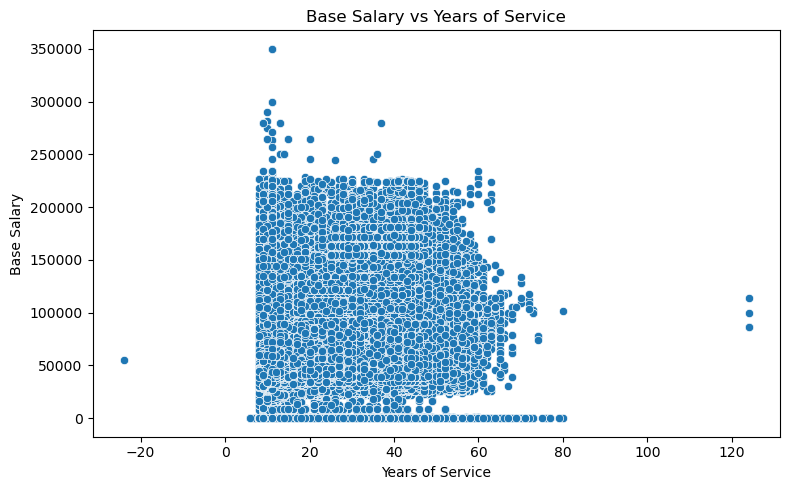

In [26]:
#Employees who joined the agency earlier tend to earn more in terms of base salary.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=copy_df, x='Years of Service', y='Base Salary')
plt.title("Base Salary vs Years of Service")
plt.xlabel("Years of Service")
plt.ylabel("Base Salary")
plt.tight_layout()
plt.show()


- Employees On Leave tend to have more years of service than Active employees.
- Suggests long-tenured employees might take more leaves (e.g., sabbaticals, parental leave, or nearing retirement).

In [27]:
copy_df['Leave Status as of June 30'].unique()

array(['ACTIVE', 'ON LEAVE', 'CEASED', 'ON SEPARATION LEAVE', 'SEASONAL'],
      dtype=object)

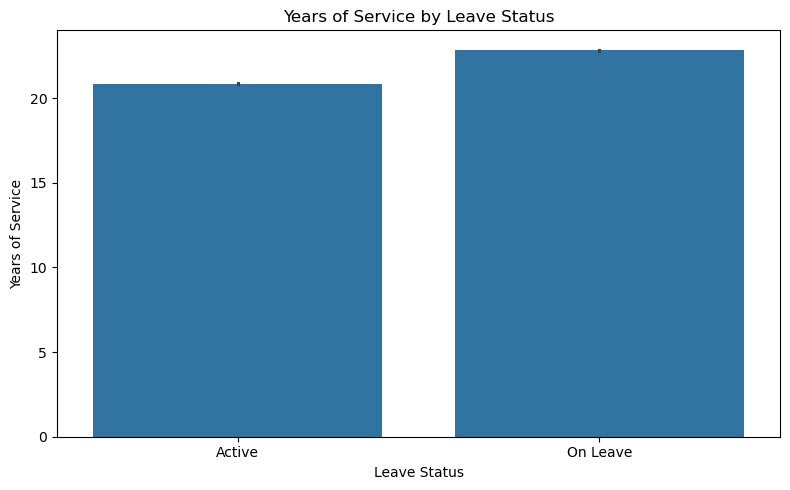

In [14]:
#Employees with longer service are more likely to be on leave as of June 30.
leave_status = ['ON LEAVE', 'CEASED', 'ON SEPARATION LEAVE']
copy_df['Leave Group'] = copy_df['Leave Status as of June 30'].apply( lambda x: 'On Leave' if str(x).upper() in leave_status else 'Active')

plt.figure(figsize=(8, 5))
sns.barplot(data=copy_df, x='Leave Group', y='Years of Service')
plt.title("Years of Service by Leave Status")
plt.xlabel("Leave Status")
plt.ylabel("Years of Service")
plt.tight_layout()
plt.show()


- Active employees earn significantly more in total pay than those On Leave.
- This makes sense, as those on leave likely aren’t receiving full salaries or bonuses during that time.

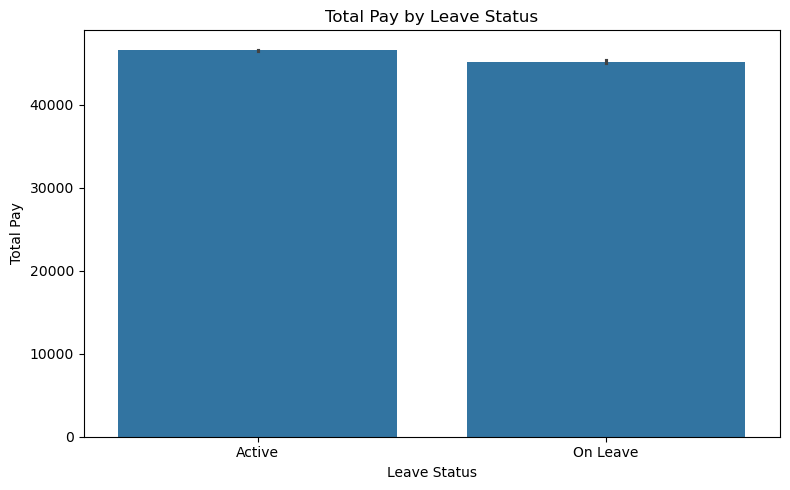

In [29]:
#Employees on leave tend to have lower total pay than active employees.
plt.figure(figsize=(8, 5))
sns.barplot(data=copy_df, x='Leave Group', y='Total Pay')
plt.title("Total Pay by Leave Status")
plt.xlabel("Leave Status")
plt.ylabel("Total Pay")
plt.tight_layout()
plt.show()


- Some job titles like "POLICE OFFICER", "LIEUTENANT", and similar roles receive significantly higher "Other Pay" compared to most other job titles.
- Most job titles have relatively low or almost no "Other Pay", showing that extra payments are concentrated in specific roles only.

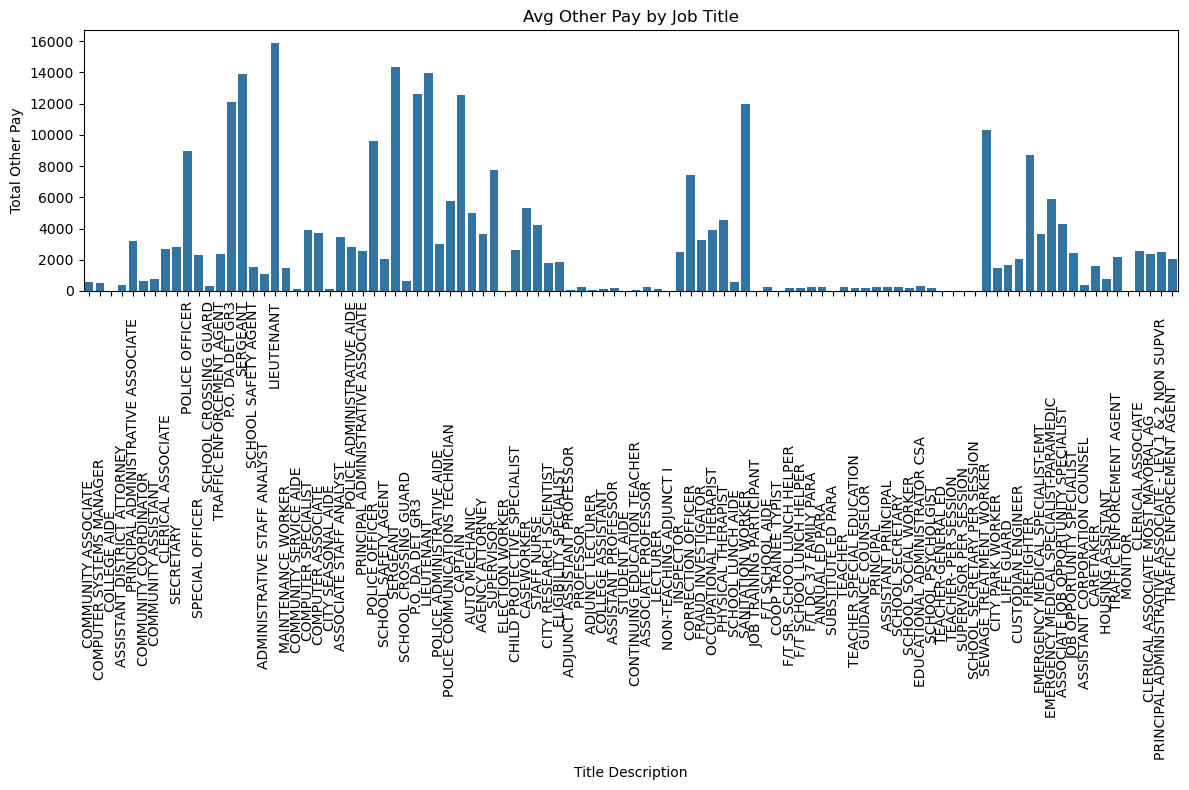

In [30]:
#Job titles with a high proportion of “other pay” (bonuses, allowances) contribute significantly to total earnings.
top_titles = copy_df['Title Description'].value_counts().head(100).index
plot_df = copy_df[copy_df['Title Description'].isin(top_titles)]

plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Title Description', y='Total Other Pay', estimator='mean',errorbar = None)
plt.xticks(rotation=90)
plt.title("Avg Other Pay by Job Title")
plt.tight_layout()
plt.show()



# -> Data Cleaning

#  Fill categorical missing values

In [33]:
# Select categorical columns with missing values
categorical_cols = ['Last Name', 'First Name', 'Mid Init', 'Work Location Borough', 'Title Description']

# Fill each with its mode
for col in categorical_cols:
    mode_val = copy_df[col].mode()[0]
    copy_df[col] = copy_df[col].fillna(mode_val)



- One hot encoding on 'Leave group' column 'Leave Status as of 30 column'


In [35]:
copy_df = copy_df.drop(columns=['Leave Status as of June 30'])
copy_df = pd.get_dummies(copy_df, columns=['Leave Group'], prefix='Leave' ,  dtype=int)

- One hot encoding on 'Job Level' column and drop 'Title Description'

In [37]:
copy_df = copy_df.drop(columns=['Title Description'])
copy_df = pd.get_dummies(copy_df, columns=['Job Level'], prefix='Level' ,  dtype=int)

- Drop rows where 'Agency Start Date' or 'Years of Service' is NaN

In [42]:
copy_df = copy_df.dropna(subset=['Agency Start Date', 'Years of Service'])

- Drop 'Agency Start Date' and 'Years of Service'

In [44]:
copy_df = copy_df.drop(columns=['Agency Start Date', 'Years of Service'])

In [45]:
copy_df.dtypes

Fiscal Year                int64
Agency Name               object
Last Name                 object
First Name                object
Mid Init                  object
Work Location Borough     object
Base Salary              float64
Pay Basis                 object
Regular Hours            float64
Regular Gross Paid       float64
OT Hours                 float64
Total OT Paid            float64
Total Other Pay          float64
Total Pay                float64
Leave_Active               int32
Leave_On Leave             int32
Level_Junior               int32
Level_Mid                  int32
Level_Senior               int32
dtype: object

- Label Encoding on pay basis column

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Apply label encoding to 'Pay Basis'
copy_df['Pay Basis'] = le.fit_transform(copy_df['Pay Basis'])


- Label Encoding on 'Work Location Borough' column

In [49]:
from sklearn.preprocessing import LabelEncoder

#  Clean spaces and cases
copy_df['Clean Borough'] = copy_df['Work Location Borough'].str.strip().str.title()

#  Label Encode the Clean Borough column
le = LabelEncoder()
copy_df['Borough Code'] = le.fit_transform(copy_df['Clean Borough'])

# drop original column
copy_df = copy_df.drop(columns=['Work Location Borough' , 'Clean Borough'])

- drop the 'Mid Init', 'First Name', 'Last Name' columns because it won't affect model performance or insights.

In [51]:
copy_df = copy_df.drop(columns=['Mid Init'])


In [52]:
copy_df = copy_df.drop(columns=['First Name', 'Last Name'])

- Label Encoding on 'Agency Name' column

In [54]:
# Clean up spaces
copy_df['Agency Name'] = copy_df['Agency Name'].str.strip()

# Apply Label Encoding
le_agency = LabelEncoder()
copy_df['Agency Code'] = le_agency.fit_transform(copy_df['Agency Name'])

# drop original column
copy_df = copy_df.drop(columns=['Agency Name'])

In [55]:
copy_df.dtypes

Fiscal Year             int64
Base Salary           float64
Pay Basis               int32
Regular Hours         float64
Regular Gross Paid    float64
OT Hours              float64
Total OT Paid         float64
Total Other Pay       float64
Total Pay             float64
Leave_Active            int32
Leave_On Leave          int32
Level_Junior            int32
Level_Mid               int32
Level_Senior            int32
Borough Code            int32
Agency Code             int32
dtype: object

In [56]:
copy_df.shape

(2194242, 16)

In [57]:
df.shape

(2194488, 16)

# Model Creation 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

- Define target and features

In [61]:
X = copy_df.drop(columns=['Total Pay'])
y = copy_df['Total Pay']

- Train-test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Train Random Forest model

In [65]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

- Make predictions

In [69]:
y_pred = rf.predict(X_test)

- Evaluation

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [113]:
print("Random Forest Regressor Results")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regressor Results
RMSE: 421.39
R² Score: 0.9999
